#### __***SHAP on Deep Learning Models***__

In [9]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import warnings
warnings.filterwarnings('ignore')

#### __***Loading MNIST data from local***__

In [2]:
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    'data/mnist/train',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128,
    shuffle=True
)

test_data = datagen.flow_from_directory(
    'data/mnist/test',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128,
    shuffle=False
)

Found 500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


#### __***Simple Deep Learning Model***__

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.2332 - loss: 2.1676 - val_accuracy: 0.6840 - val_loss: 1.7662
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8028 - loss: 1.4516 - val_accuracy: 0.7280 - val_loss: 1.2415
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8436 - loss: 0.8908 - val_accuracy: 0.7440 - val_loss: 0.9175
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8782 - loss: 0.5515 - val_accuracy: 0.7660 - val_loss: 0.7479
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8874 - loss: 0.4004 - val_accuracy: 0.7980 - val_loss: 0.6356
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8983 - loss: 0.3446 - val_accuracy: 0.8160 - val_loss: 0.5544
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9227 - loss: 0.2483 - val_accuracy: 0.8280 - val_loss: 0.5067
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9411 - loss: 0.2353 - val_accuracy: 0.8420 - val_loss: 0.4619

#### __***Shap Explanation***__

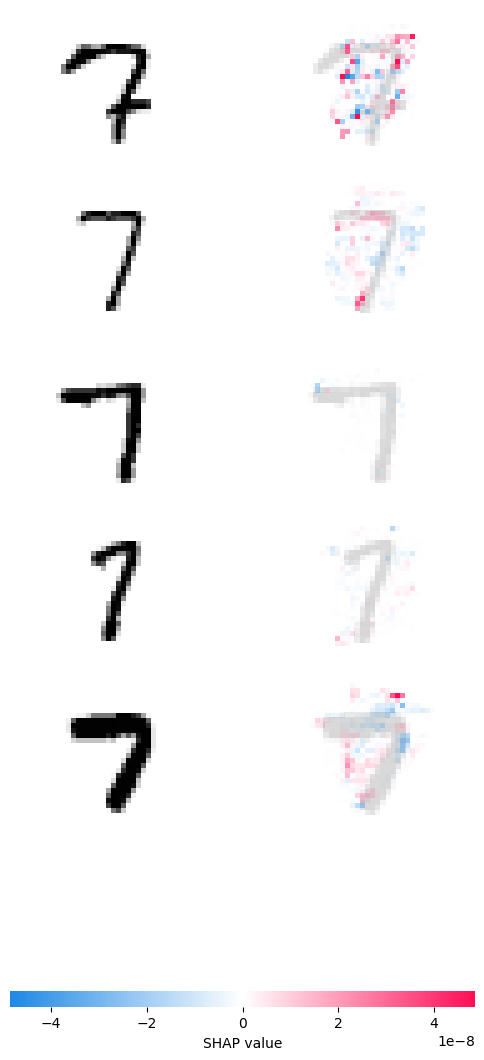

In [8]:
x_test_sample, _ = next(test_data)
background = x_test_sample[:100]
explainer = shap.DeepExplainer(model, background)

test_images, _ = next(test_data)
shap_values = explainer.shap_values(test_images[10:15])

shap.image_plot(shap_values, -test_images[:5], show=False)
plt.show()